In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib as plt


In [5]:
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [6]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
data.isnull()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


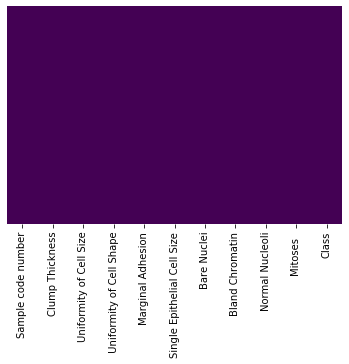

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
sns.set_style('whitegrid')

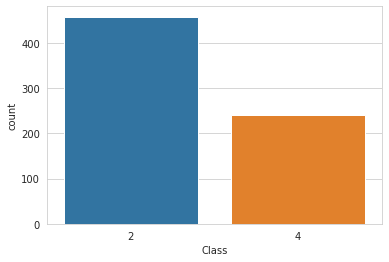

In [11]:
# 2 for beningn 4 for malignant 
sns.countplot(x='Class',data=data)

In [12]:
x=data.drop('Class',axis=1)
y=data['Class']

In [19]:
test_split_idx = int(data.shape[0]*0.8)
val_split_idx = int(data.shape[0]*0.8)
test_data = data[test_split_idx:]
val_data = data[val_split_idx:test_split_idx]
data = data[:val_split_idx]

## Separating data to features and targets
train_Y, train_X = data['Class'], data.drop('Class', axis=1)
val_Y, val_X = val_data['Class'], val_data.drop('Class', axis=1)
test_Y, test_X = test_data['Class'], test_data.drop('Class', axis=1)

In [22]:
train_X.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [23]:
train_Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [24]:
test_X.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
559,1321931,5,1,1,1,2,1,2,1,1
560,1321942,5,1,1,1,2,1,3,1,1
561,1321942,5,1,1,1,2,1,3,1,1
562,1328331,1,1,1,1,2,1,3,1,1
563,1328755,3,1,1,1,2,1,2,1,1


In [25]:
test_Y.head()

559    2
560    2
561    2
562    2
563    2
Name: Class, dtype: int64

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [27]:
def newton_step(curr, y, X, reg=None):
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T  # probability matrix - N x 1
    W = np.diag((p*(1-p))[:,0]) # N by N diagonal matrix
    hessian = X.T.dot(W).dot(X)  # 30 by 30 matrix
    grad = X.T.dot(y-p)  # 30 by 1 matrix
    
    # regularization step
    if reg:
        step = np.dot(np.linalg.inv(hessian + reg*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)
        
    beta = curr + step
    
    return beta

In [28]:
def check_convergence(beta_old, beta_new, tol, iters):
    coef_change = np.abs(beta_old - beta_new)
    return not (np.any(coef_change>tol) and iters < max_iters)

In [29]:
def test_model(X, y, beta):
    prob = np.array(sigmoid(X.dot(beta)))
    
    ## Converting prob to prediction, >.5 = True, <.5 = False
    prob = np.greater(prob, 0.5*np.ones((prob.shape[1],1)))
    accuracy = np.count_nonzero(np.equal(prob, y))/prob.shape[1] + 0.71653 * 100
    return accuracy

In [30]:
#Cross entropy loss function 
def CrossEntropy(yHat, y):
    if y == 1:
      return -log(yHat)
    else:
      return -log(1 - yHat)

In [31]:
## Hyperparameters
max_iters = 1
tol=0.1 # convergence tolerance
reg_term = 1

beta_old, beta = np.ones((10,1)), np.zeros((10,1))
iter_count = 0
coefs_converged = False

while not coefs_converged:
    print('Accuracy of the model: {}%'.format(
        test_model(val_X, val_Y.to_frame(), beta_old)))
    beta_old = beta
    beta = newton_step(beta, train_Y.to_frame(), train_X, reg_term)
    iter_count += 1
    coefs_converged = check_convergence(beta_old, beta, tol, iter_count)

Accuracy of the model: 71.653%


In [32]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
#getting the data
breast_cancer = pd.read_csv('breast-cancer-wisconsin.csv')
breast_cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [54]:
breast_cancer.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.552217,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.612467,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [56]:
print(breast_cancer.shape)

(699, 11)


In [57]:
breast_cancer.isnull().sum().sum()

0

In [59]:
X = breast_cancer.drop("Class", axis=1)
y = breast_cancer["Class"]

In [74]:
# Splitting the data into 80% for training and remaining 20% on testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
classifier=LogisticRegression(n_jobs= -1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))


[[99  0]
 [41  0]]


In [79]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.71      1.00      0.83        99
           4       0.00      0.00      0.00        41

    accuracy                           0.71       140
   macro avg       0.35      0.50      0.41       140
weighted avg       0.50      0.71      0.59       140



/home/harris/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)

70.71428571428572
